In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import os


In [2]:
# Read the .csv file
housing_price = pd.read_csv('Resources/housing_prices.csv')
housing_price.head()


,Date,Area,Composite_HPI,Two_Storey_HPI,Apartment_HPI,Composite_Benchmark,Two_Storey_Benchmark,Apartment_Benchmark
0,Jan 2005,Barrie_and_District,100.0,100.0,100.0,209000.0,220600.0,166400.0
1,Feb 2005,Barrie_and_District,101.5,101.2,100.3,212100.0,223200.0,166900.0
2,Mar 2005,Barrie_and_District,102.8,102.9,100.6,214800.0,227000.0,167400.0
3,Apr 2005,Barrie_and_District,103.5,103.4,100.9,216300.0,228100.0,167900.0
4,May 2005,Barrie_and_District,104.5,104.0,101.2,218400.0,229400.0,168400.0


In [3]:
# Get the dimensions of the DataFrame
housing_price.shape

(1124, 8)

In [4]:
# Drop any field which have no value
housing_price = housing_price.dropna()
housing_price.head()


,Date,Area,Composite_HPI,Two_Storey_HPI,Apartment_HPI,Composite_Benchmark,Two_Storey_Benchmark,Apartment_Benchmark
0,Jan 2005,Barrie_and_District,100.0,100.0,100.0,209000.0,220600.0,166400.0
1,Feb 2005,Barrie_and_District,101.5,101.2,100.3,212100.0,223200.0,166900.0
2,Mar 2005,Barrie_and_District,102.8,102.9,100.6,214800.0,227000.0,167400.0
3,Apr 2005,Barrie_and_District,103.5,103.4,100.9,216300.0,228100.0,167900.0
4,May 2005,Barrie_and_District,104.5,104.0,101.2,218400.0,229400.0,168400.0


In [20]:
# Get the dimensions of the DataFrame
housing_price.shape


(1110, 8)

In [6]:
# Rename the headers to get a clear understanding of the column
housing_price = housing_price.rename(columns = {"Area" : "Region",
                                               "Composite_HPI" : "Composite HPI",
                                               "Two_Storey_HPI" : "Two Storey HPI",
                                               "Apartment_HPI" : "Apartment HPI",
                                               "Composite_Benchmark" : "Benchmark Price (Composite)",
                                               "Two_Storey_Benchmark" : "Benchmark Price (Two-Storey)",
                                               "Apartment_Benchmark" : "Benchmark Price (Apartment)"
                                               })
housing_price.head()


,Date,Region,Composite HPI,Two Storey HPI,Apartment HPI,Benchmark Price (Composite),Benchmark Price (Two-Storey),Benchmark Price (Apartment)
0,Jan 2005,Barrie_and_District,100.0,100.0,100.0,209000.0,220600.0,166400.0
1,Feb 2005,Barrie_and_District,101.5,101.2,100.3,212100.0,223200.0,166900.0
2,Mar 2005,Barrie_and_District,102.8,102.9,100.6,214800.0,227000.0,167400.0
3,Apr 2005,Barrie_and_District,103.5,103.4,100.9,216300.0,228100.0,167900.0
4,May 2005,Barrie_and_District,104.5,104.0,101.2,218400.0,229400.0,168400.0


In [7]:

housing_price["Region"].unique()

array(['Barrie_and_District', 'Greater_Toronto', 'Guelph',
       'Hamilton_Burlington', 'Niagara_Region', 'Oakville_Milton'],
      dtype=object)

In [8]:
# housing_price = housing_price.loc[housing_price["Region"] == "Barrie_and_District"]
# housing_price["Region"].rename()


In [21]:
# Get the data to compare the price of the building during May 2005 and May 2020
housingPrice_2005_2020 = housing_price.loc[((housing_price["Date"] == "May 2005") | (housing_price["Date"] == "May 2020"))]
housingPrice_2005_2020 = housingPrice_2005_2020[["Date", "Region", "Benchmark Price (Composite)"]]

# Return reshaped organized DataFrame 
housingPrice_pivot = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= "Benchmark Price (Composite)" )
housingPrice_pivot.plot(kind = "bar", rot = "vertical", figsize = (10, 8))
plt.xlabel("Name of Region")
plt.ylabel("Benchmark price for Apartment & Two-Storey")
plt.title("Comparision of prices of Apartment & Two-Storey for the year 2005 & 2020")
plt.figure(figsize = (20, 10))
plt.show()


Date,May 2005,May 2020
Region,,
Barrie_and_District,218400.0,516400.0
Greater_Toronto,314100.0,870000.0
Guelph,253500.0,592100.0
Hamilton_Burlington,230700.0,659800.0
Niagara_Region,177300.0,456400.0
Oakville_Milton,396700.0,1100000.0


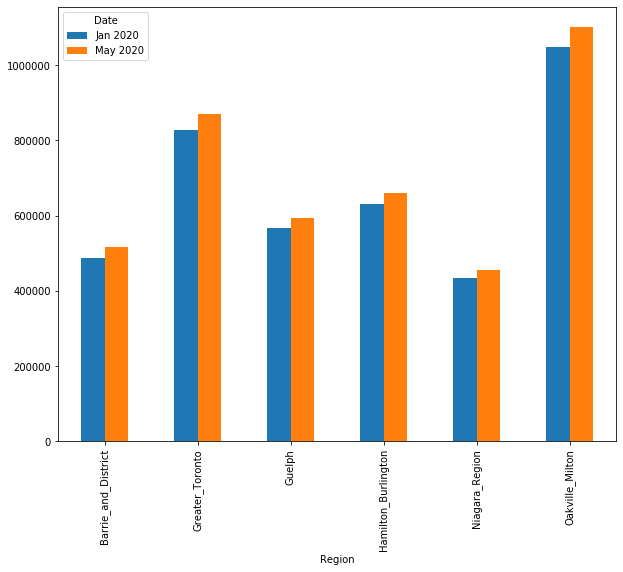

<Figure size 1440x720 with 0 Axes>

In [10]:
housingPrice_2005_2020 = housing_price.loc[((housing_price["Date"] == "Jan 2020") | (housing_price["Date"] == "May 2020"))]
housingPrice_2005_2020 = housingPrice_2005_2020[["Date", "Region", "Benchmark Price (Composite)"]]

housingPrice_pivot = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= "Benchmark Price (Composite)")
housingPrice_pivot.plot(kind = "bar", rot = "vertical", figsize = (10, 8))

plt.figure(figsize = (20, 10))
plt.show()


In [11]:
# year_2005 = ["Jan 2005", "Feb 2005", "Mar 2005", "Apr 2005", "May 2005"]
# year_2010 = ["Jan 2010", "Feb 2010", "Mar 2010", "Apr 2010", "May 2010"]

# new = []

# for month in year_2005:

#     df = housing_price.loc[(housing_price["Date"] == month)]
#     new.append(df["Composite_Benchmark"])
# plt.plot(year_2005, new)


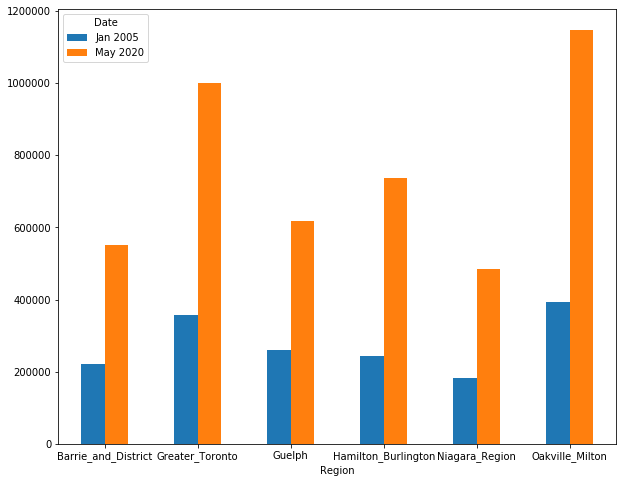

<Figure size 1440x720 with 0 Axes>

In [17]:
housingPrice_2005_2020 = housing_price.loc[((housing_price["Date"] == "Jan 2005") | (housing_price["Date"] == "May 2020"))]
housingPrice_2005_2020 = housingPrice_2005_2020[["Date", "Region", "Benchmark Price (Two-Storey)", "Benchmark Price (Apartment)"]]




new = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= "Benchmark Price (Two-Storey)" )
new.plot(kind = "bar", rot = 0, figsize = (10, 8))

plt.figure(figsize = (20, 10))
plt.show()


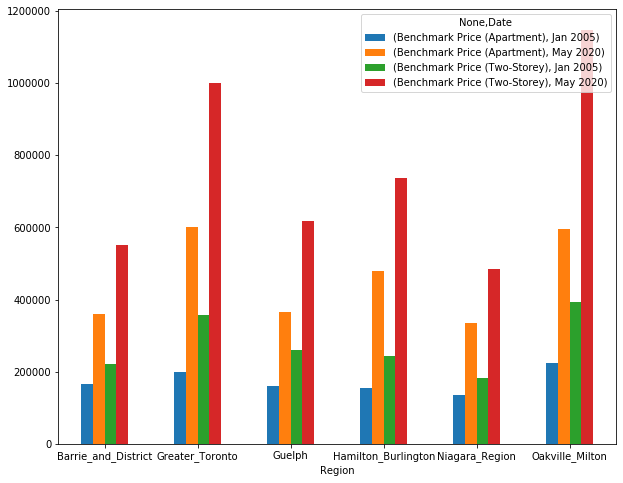

<Figure size 1440x720 with 0 Axes>

In [18]:
new = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= ["Benchmark Price (Apartment)", "Benchmark Price (Two-Storey)"] )
new.plot(kind = "bar", rot = 0, figsize = (10, 8))
# new.plot.bar(rot=0)
plt.figure(figsize = (20, 10))
plt.show()


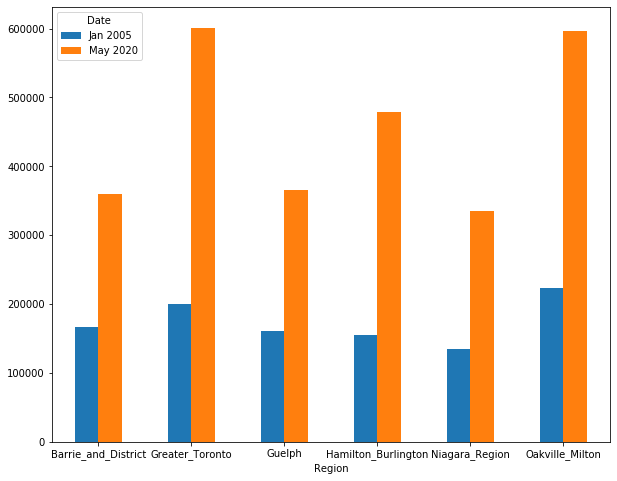

<Figure size 1440x720 with 0 Axes>

In [19]:
new = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= "Benchmark Price (Apartment)" )
new.plot(kind = "bar", rot = 0, figsize = (10, 8))

plt.figure(figsize = (20, 10))
plt.show()


In [23]:
housing_price.loc[(housing_price["Region"] == "Greater_Toronto") | (housing_price["Region"] == "Oakville_Milton")]
                 
                 
                 
                 

,Date,Region,Composite HPI,Two Storey HPI,Apartment HPI,Benchmark Price (Composite),Benchmark Price (Two-Storey),Benchmark Price (Apartment)
185,Jan 2005,Greater_Toronto,100.0,100.0,100.0,303500.0,358300.0,200400.0
186,Feb 2005,Greater_Toronto,100.9,101.1,100.0,306200.0,362300.0,200400.0
187,Mar 2005,Greater_Toronto,101.9,102.4,100.7,309200.0,366900.0,201800.0
188,Apr 2005,Greater_Toronto,102.7,103.4,101.1,311700.0,370500.0,202600.0
189,May 2005,Greater_Toronto,103.5,103.9,102.0,314100.0,372300.0,204400.0
...,...,...,...,...,...,...,...,...
1105,Jan 2020,Oakville_Milton,276.4,280.4,247.6,1048400.0,1100600.0,553600.0
1106,Feb 2020,Oakville_Milton,284.2,289.9,248.4,1078000.0,1137900.0,555400.0
1107,Mar 2020,Oakville_Milton,293.5,300.0,253.1,1113200.0,1177500.0,565900.0
1108,Apr 2020,Oakville_Milton,289.2,292.8,257.1,1096900.0,1149300.0,574900.0
